# Experiement: First Round | 9%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_9.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  40027  20448       2     173    64.0    130     90            1     1   
1  63254  18203       2     175    74.0    130     80            3     1   
2  51545  23292       1     152    53.0    120     80            1     1   
3  58751  19080       2     170    70.0    140     90            1     1   
4  28892  18321       1     160    72.0    120     80            1     1   

   smoke  alco  active  cardio  
0      1     0       1       1  
1      0     0       1       1  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       1       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38179 entries, 0 to 38178
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           38179 non-null  int64  
 1   age          38179 non-null  int64  
 2   gender       38179 non-null  int64  
 3   height       38179 non-null  int64  
 4   weight       38179 non-null  float64
 5   ap_hi        38179 non-null  int64  
 6   ap_lo        38179 non-null  int64  
 7   cholesterol  38179 non-null  int64  
 8   gluc         38179 non-null  int64  
 9   smoke        38179 non-null  int64  
 10  alco         38179 non-null  int64  
 11  active       38179 non-null  int64  
 12  cardio       38179 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 3.8 MB


0    34679
1     3500
Name: cardio, dtype: int64

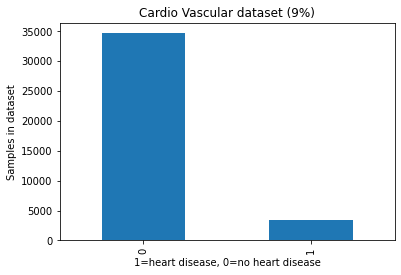

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (9%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

Balance ratio: 3500/38179 = 0,091673

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

In [5]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
9703   18478  18147       1     180    69.0    140    100            1     1   
25036  62475  18736       1     153    57.0    110     70            1     1   
34624  89715  20285       2     175    63.0    125     80            1     1   
30921  79064  18228       1     165    58.0    120     79            1     1   
25275  63124  14671       1     165    85.0    120     80            1     1   

       smoke  alco  active  
9703       0     0       0  
25036      0     0       1  
34624      0     0       1  
30921      0     0       1  
25275      0     0       0

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27743
           1       0.26      0.00      0.01      2800

    accuracy                           0.91     30543
   macro avg       0.58      0.50      0.48     30543
weighted avg       0.85      0.91      0.87     30543



In [7]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6936
           1       0.07      0.00      0.00       700

    accuracy                           0.91      7636
   macro avg       0.49      0.50      0.48      7636
weighted avg       0.83      0.91      0.86      7636



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.667


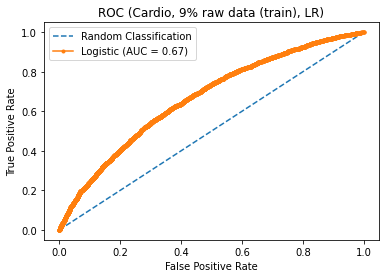

In [8]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.625


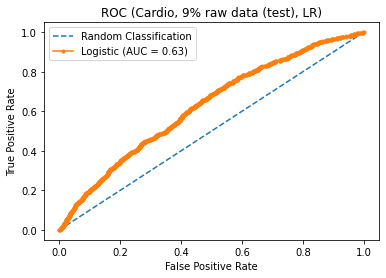

In [9]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27743
           1       0.95      0.01      0.01      2800

    accuracy                           0.91     30543
   macro avg       0.93      0.50      0.48     30543
weighted avg       0.91      0.91      0.87     30543



In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6936
           1       0.60      0.00      0.01       700

    accuracy                           0.91      7636
   macro avg       0.75      0.50      0.48      7636
weighted avg       0.88      0.91      0.87      7636



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.746


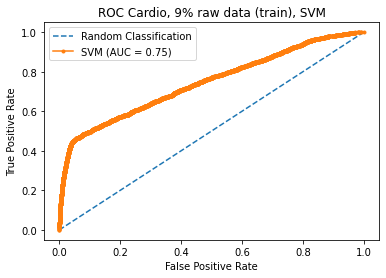

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.584


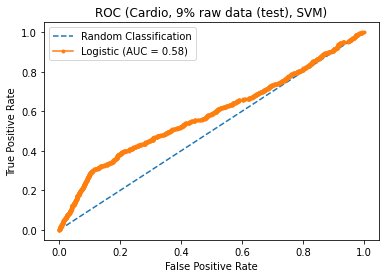

In [13]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw dataset

In [14]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [15]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.09102	validation_0-logloss:0.62554	validation_1-error:0.09246	validation_1-logloss:0.62618
[1]	validation_0-error:0.09079	validation_0-logloss:0.57018	validation_1-error:0.09219	validation_1-logloss:0.57130
[2]	validation_0-error:0.09105	validation_0-logloss:0.52420	validation_1-error:0.09167	validation_1-logloss:0.52570
[3]	validation_0-error:0.09141	validation_0-logloss:0.48574	validation_1-error:0.09167	validation_1-logloss:0.48776
[4]	validation_0-error:0.09141	validation_0-logloss:0.45324	validation_1-error:0.09167	validation_1-logloss:0.45571
[5]	validation_0-error:0.09141	validation_0-logloss:0.42549	validation_1-error:0.09167	validation_1-logloss:0.42845
[6]	validation_0-error:0.09138	validation_0-logloss:0.40177	validation_1-error:0.09180	validation_1-logloss:0.40518
[7]	validation_0-error:0.09128	validation_0-logloss:0.38125	validation_1-error:0.09167	validation_1-logloss:0.38513
[8]	validation_0-error:0.09131	validation_0-logloss:0.36358	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27743
           1       0.78      0.01      0.03      2800

    accuracy                           0.91     30543
   macro avg       0.85      0.51      0.49     30543
weighted avg       0.90      0.91      0.87     30543



In [17]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6936
           1       0.33      0.00      0.01       700

    accuracy                           0.91      7636
   macro avg       0.62      0.50      0.48      7636
weighted avg       0.86      0.91      0.87      7636



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.825


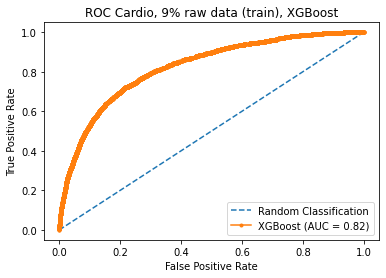

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [19]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.777


# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [20]:
df_train = X_train
df_train['cardio'] = y_train

In [21]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
9703   18478  18147       1     180    69.0    140    100            1     1   
25036  62475  18736       1     153    57.0    110     70            1     1   
34624  89715  20285       2     175    63.0    125     80            1     1   
30921  79064  18228       1     165    58.0    120     79            1     1   
25275  63124  14671       1     165    85.0    120     80            1     1   

       smoke  alco  active  cardio  
9703       0     0       0       0  
25036      0     0       1       0  
34624      0     0       1       0  
30921      0     0       1       0  
25275      0     0       0       0


### SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

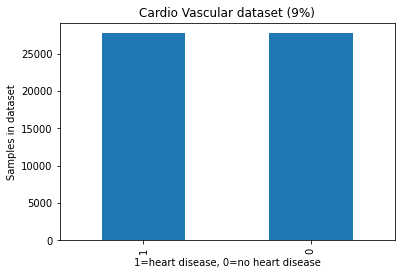

In [22]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (9%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [23]:
X_train = df_oversampler
y_train = df_oversampler_y

## Logistic Regression with data from SMOTE

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     27743
           1       0.72      0.70      0.71     27743

    accuracy                           0.72     55486
   macro avg       0.72      0.72      0.72     55486
weighted avg       0.72      0.72      0.72     55486



In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      6936
           1       0.18      0.60      0.28       700

    accuracy                           0.71      7636
   macro avg       0.56      0.66      0.55      7636
weighted avg       0.88      0.71      0.77      7636



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.778


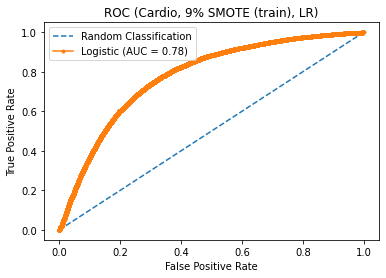

In [26]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.720


## SVM with data from SMOTE

In [28]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     27743
           1       0.79      0.78      0.79     27743

    accuracy                           0.79     55486
   macro avg       0.79      0.79      0.79     55486
weighted avg       0.79      0.79      0.79     55486



In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      6936
           1       0.18      0.49      0.27       700

    accuracy                           0.76      7636
   macro avg       0.56      0.63      0.56      7636
weighted avg       0.87      0.76      0.80      7636



In [30]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.863


In [31]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.710


## XGBoost with data from SMOTE

In [32]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.18533	validation_0-logloss:0.64979	validation_1-error:0.16972	validation_1-logloss:0.65387
[1]	validation_0-error:0.18360	validation_0-logloss:0.61387	validation_1-error:0.20914	validation_1-logloss:0.62145
[2]	validation_0-error:0.18680	validation_0-logloss:0.58475	validation_1-error:0.20665	validation_1-logloss:0.59509
[3]	validation_0-error:0.16878	validation_0-logloss:0.55733	validation_1-error:0.17889	validation_1-logloss:0.57051
[4]	validation_0-error:0.18192	validation_0-logloss:0.53762	validation_1-error:0.20325	validation_1-logloss:0.55317
[5]	validation_0-error:0.18150	validation_0-logloss:0.51979	validation_1-error:0.20194	validation_1-logloss:0.53723
[6]	validation_0-error:0.17595	validation_0-logloss:0.50191	validation_1-error:0.20325	validation_1-logloss:0.52212
[7]	validation_0-error:0.17732	validation_0-logloss:0.48664	validation_1-error:0.20286	validation_1-logloss:0.50886
[8]	validation_0-error:0.17314	validation_0-logloss:0.47402	validation_1

[71]	validation_0-error:0.12261	validation_0-logloss:0.29667	validation_1-error:0.14864	validation_1-logloss:0.36283
[72]	validation_0-error:0.12216	validation_0-logloss:0.29596	validation_1-error:0.14877	validation_1-logloss:0.36242
[73]	validation_0-error:0.12162	validation_0-logloss:0.29544	validation_1-error:0.14890	validation_1-logloss:0.36207
[74]	validation_0-error:0.12140	validation_0-logloss:0.29459	validation_1-error:0.14824	validation_1-logloss:0.36162
[75]	validation_0-error:0.12109	validation_0-logloss:0.29433	validation_1-error:0.14851	validation_1-logloss:0.36148
[76]	validation_0-error:0.12093	validation_0-logloss:0.29368	validation_1-error:0.14811	validation_1-logloss:0.36095
[77]	validation_0-error:0.12062	validation_0-logloss:0.29308	validation_1-error:0.14733	validation_1-logloss:0.36080
[78]	validation_0-error:0.12057	validation_0-logloss:0.29247	validation_1-error:0.14680	validation_1-logloss:0.36066
[79]	validation_0-error:0.12030	validation_0-logloss:0.29209	val

[141]	validation_0-error:0.10513	validation_0-logloss:0.25845	validation_1-error:0.13685	validation_1-logloss:0.34261
[142]	validation_0-error:0.10476	validation_0-logloss:0.25723	validation_1-error:0.13607	validation_1-logloss:0.34212
[143]	validation_0-error:0.10453	validation_0-logloss:0.25643	validation_1-error:0.13567	validation_1-logloss:0.34186
[144]	validation_0-error:0.10408	validation_0-logloss:0.25559	validation_1-error:0.13580	validation_1-logloss:0.34146
[145]	validation_0-error:0.10368	validation_0-logloss:0.25535	validation_1-error:0.13659	validation_1-logloss:0.34149
[146]	validation_0-error:0.10338	validation_0-logloss:0.25472	validation_1-error:0.13646	validation_1-logloss:0.34111
[147]	validation_0-error:0.10327	validation_0-logloss:0.25456	validation_1-error:0.13567	validation_1-logloss:0.34109
[148]	validation_0-error:0.10312	validation_0-logloss:0.25440	validation_1-error:0.13528	validation_1-logloss:0.34103
[149]	validation_0-error:0.10309	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     27743
           1       0.94      0.88      0.91     27743

    accuracy                           0.91     55486
   macro avg       0.91      0.91      0.91     55486
weighted avg       0.91      0.91      0.91     55486



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6936
           1       0.27      0.24      0.25       700

    accuracy                           0.87      7636
   macro avg       0.60      0.59      0.59      7636
weighted avg       0.86      0.87      0.87      7636



In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.969


In [36]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.748


## Data augmentation with TVAE 

In [37]:
df_train['cardio'].value_counts()

0    27743
1     2800
Name: cardio, dtype: int64

In [38]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(3000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1     2807
Name: cardio, dtype: int64

In [39]:
tvae = TVAE()

tvae.fit(tvae_result_df)
# Once trained generate samples
samples = tvae.sample(5000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df1 = pd.concat([tvae_result_df,samples])
tvae_result_df1['cardio'].value_counts()

0    27743
1     3711
Name: cardio, dtype: int64

In [40]:
tvae = TVAE()

tvae.fit(tvae_result_df1)
# Once trained generate samples
samples = tvae.sample(7000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df2 = pd.concat([tvae_result_df1,samples])
tvae_result_df2['cardio'].value_counts()

0    27743
1     3717
Name: cardio, dtype: int64

In [41]:
tvae = TVAE()

tvae.fit(tvae_result_df2)
# Once trained generate samples
samples = tvae.sample(7500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df3 = pd.concat([tvae_result_df2,samples])
tvae_result_df3['cardio'].value_counts()

0    27743
1     4529
Name: cardio, dtype: int64

In [42]:
tvae = TVAE()

tvae.fit(tvae_result_df3)
# Once trained generate samples
samples = tvae.sample(5000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df4 = pd.concat([tvae_result_df3,samples])
tvae_result_df4['cardio'].value_counts()

0    27743
1     4665
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(tvae_result_df4)
# Once trained generate samples
samples = tvae.sample(7000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df5 = pd.concat([tvae_result_df4,samples])
tvae_result_df5['cardio'].value_counts()

0    27743
1     6160
Name: cardio, dtype: int64

In [46]:
tvae = TVAE()

tvae.fit(tvae_result_df5)
# Once trained generate samples
samples = tvae.sample(7000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df6 = pd.concat([tvae_result_df5,samples])
tvae_result_df6['cardio'].value_counts()

0    27743
1     8579
Name: cardio, dtype: int64

In [47]:
tvae = TVAE()

tvae.fit(tvae_result_df6)
# Once trained generate samples
samples = tvae.sample(6000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df7 = pd.concat([tvae_result_df6,samples])
tvae_result_df7['cardio'].value_counts()

0    27743
1    10085
Name: cardio, dtype: int64

In [48]:
tvae = TVAE()

tvae.fit(tvae_result_df7)
# Once trained generate samples
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df8 = pd.concat([tvae_result_df7,samples])
tvae_result_df8['cardio'].value_counts()

0    27743
1    13290
Name: cardio, dtype: int64

In [49]:
tvae = TVAE()

tvae.fit(tvae_result_df8)
# Once trained generate samples
samples = tvae.sample(12000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df9 = pd.concat([tvae_result_df8,samples])
tvae_result_df9['cardio'].value_counts()

0    27743
1    16665
Name: cardio, dtype: int64

In [50]:
tvae = TVAE()

tvae.fit(tvae_result_df9)
# Once trained generate samples
samples = tvae.sample(13000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df10 = pd.concat([tvae_result_df9,samples])
tvae_result_df10['cardio'].value_counts()

0    27743
1    18450
Name: cardio, dtype: int64

In [51]:
tvae = TVAE()

tvae.fit(tvae_result_df10)
# Once trained generate samples
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df11 = pd.concat([tvae_result_df10,samples])
tvae_result_df11['cardio'].value_counts()

0    27743
1    18664
Name: cardio, dtype: int64

In [52]:
tvae = TVAE()

tvae.fit(tvae_result_df11)
# Once trained generate samples
samples = tvae.sample(23000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df12 = pd.concat([tvae_result_df11,samples])
tvae_result_df12['cardio'].value_counts()

0    27743
1    24955
Name: cardio, dtype: int64

In [53]:
tvae = TVAE()

tvae.fit(tvae_result_df12)
# Once trained generate samples
samples = tvae.sample(27000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df13 = pd.concat([tvae_result_df12,samples])
tvae_result_df13['cardio'].value_counts()

0    27743
1    26533
Name: cardio, dtype: int64

In [57]:
tvae = TVAE()

tvae.fit(tvae_result_df13)
# Once trained generate samples
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df14 = pd.concat([tvae_result_df13,samples])
tvae_result_df14['cardio'].value_counts()

1    35568
0    27743
Name: cardio, dtype: int64

In [58]:
tvae_result_df_1 = tvae_result_df14[tvae_result_df14['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    35568
Name: cardio, dtype: int64

In [59]:
tvae_result_df_0 = tvae_result_df13[tvae_result_df13['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [60]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)

In [61]:
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

In [62]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (9%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [63]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE balanced data

In [64]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82     27743
           1       0.86      0.74      0.80     27743

    accuracy                           0.81     55486
   macro avg       0.82      0.81      0.81     55486
weighted avg       0.82      0.81      0.81     55486



In [65]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6936
           1       0.11      0.13      0.12       700

    accuracy                           0.82      7636
   macro avg       0.51      0.51      0.51      7636
weighted avg       0.84      0.82      0.83      7636



In [66]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.863


In [67]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.456


## SVM with TVAE balanced data

In [68]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     27743
           1       0.97      0.87      0.92     27743

    accuracy                           0.92     55486
   macro avg       0.93      0.92      0.92     55486
weighted avg       0.93      0.92      0.92     55486



In [69]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6936
           1       0.18      0.06      0.09       700

    accuracy                           0.89      7636
   macro avg       0.54      0.52      0.52      7636
weighted avg       0.84      0.89      0.86      7636



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.961


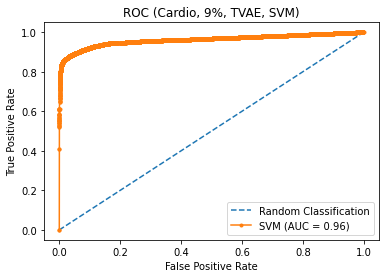

In [70]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.598


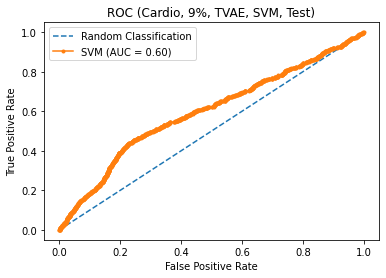

In [71]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE balanced data

In [72]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.12205	validation_0-logloss:0.63020	validation_1-error:0.09167	validation_1-logloss:0.64119
[1]	validation_0-error:0.12205	validation_0-logloss:0.57870	validation_1-error:0.09167	validation_1-logloss:0.59846
[2]	validation_0-error:0.12205	validation_0-logloss:0.53601	validation_1-error:0.09167	validation_1-logloss:0.56290
[3]	validation_0-error:0.09985	validation_0-logloss:0.49985	validation_1-error:0.12729	validation_1-logloss:0.53354
[4]	validation_0-error:0.08330	validation_0-logloss:0.46704	validation_1-error:0.11524	validation_1-logloss:0.50722
[5]	validation_0-error:0.08415	validation_0-logloss:0.44037	validation_1-error:0.10477	validation_1-logloss:0.48400
[6]	validation_0-error:0.08660	validation_0-logloss:0.41685	validation_1-error:0.09678	validation_1-logloss:0.46327
[7]	validation_0-error:0.08238	validation_0-logloss:0.39465	validation_1-error:0.10647	validation_1-logloss:0.44470
[8]	validation_0-error:0.08099	validation_0-logloss:0.37621	validation_1

[71]	validation_0-error:0.05542	validation_0-logloss:0.15799	validation_1-error:0.09966	validation_1-logloss:0.28034
[72]	validation_0-error:0.05538	validation_0-logloss:0.15764	validation_1-error:0.09953	validation_1-logloss:0.28039
[73]	validation_0-error:0.05515	validation_0-logloss:0.15725	validation_1-error:0.10031	validation_1-logloss:0.28039
[74]	validation_0-error:0.05490	validation_0-logloss:0.15660	validation_1-error:0.10018	validation_1-logloss:0.28016
[75]	validation_0-error:0.05479	validation_0-logloss:0.15630	validation_1-error:0.10005	validation_1-logloss:0.28005
[76]	validation_0-error:0.05445	validation_0-logloss:0.15569	validation_1-error:0.10005	validation_1-logloss:0.27979
[77]	validation_0-error:0.05445	validation_0-logloss:0.15553	validation_1-error:0.09992	validation_1-logloss:0.27973
[78]	validation_0-error:0.05416	validation_0-logloss:0.15474	validation_1-error:0.10005	validation_1-logloss:0.27935
[79]	validation_0-error:0.05394	validation_0-logloss:0.15435	val

[141]	validation_0-error:0.04810	validation_0-logloss:0.13730	validation_1-error:0.09940	validation_1-logloss:0.27655
[142]	validation_0-error:0.04810	validation_0-logloss:0.13719	validation_1-error:0.09940	validation_1-logloss:0.27654
[143]	validation_0-error:0.04794	validation_0-logloss:0.13690	validation_1-error:0.09900	validation_1-logloss:0.27663
CPU times: user 13.4 s, sys: 292 ms, total: 13.6 s
Wall time: 8.54 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     27743
           1       0.99      0.91      0.95     27743

    accuracy                           0.95     55486
   macro avg       0.95      0.95      0.95     55486
weighted avg       0.95      0.95      0.95     55486



In [74]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6936
           1       0.24      0.04      0.07       700

    accuracy                           0.90      7636
   macro avg       0.58      0.51      0.51      7636
weighted avg       0.85      0.90      0.87      7636



In [75]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.983


No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.754


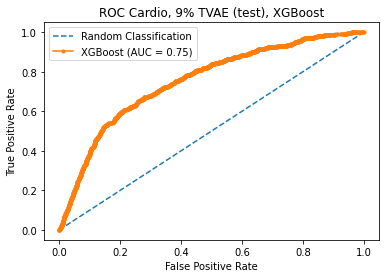

In [76]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## CTGAN for balancing the dataset

In [77]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(df_train, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(5000)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    829
Name: cardio, dtype: int64

In [78]:
df_train_1 = df_train.append(samples)
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples1 = ctgan.sample(7000)
samples1 = samples1[samples1['cardio'] ==1.0]
df_train_2 = df_train_1.append(samples1)
df_train_2['cardio'].value_counts()

0    27743
1     4398
Name: cardio, dtype: int64

In [79]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples2 = ctgan.sample(8000)
samples2 = samples2[samples2['cardio'] ==1.0]

0    27743
1     5167
Name: cardio, dtype: int64

In [80]:
df_train_3 = df_train_2.append(samples2)
df_train_3['cardio'].value_counts()

0    27743
1     5626
Name: cardio, dtype: int64

In [82]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_3, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples3 = ctgan.sample(6000)
samples3 = samples3[samples3['cardio'] ==1.0]
df_train_4 = df_train_3.append(samples3)
df_train_4['cardio'].value_counts()

0    27743
1     6561
Name: cardio, dtype: int64

In [83]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_4, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples4 = ctgan.sample(6000)
samples4 = samples4[samples4['cardio'] ==1.0]
df_train_5 = df_train_4.append(samples4)
df_train_5['cardio'].value_counts()

0    27743
1     8055
Name: cardio, dtype: int64

In [84]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_5, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples5 = ctgan.sample(8000)
samples5 = samples5[samples5['cardio'] ==1.0]
df_train_6 = df_train_5.append(samples5)
df_train_6['cardio'].value_counts()

0    27743
1    10223
Name: cardio, dtype: int64

In [85]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_6, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples6 = ctgan.sample(10000)
samples6 = samples6[samples6['cardio'] ==1.0]
df_train_7 = df_train_6.append(samples6)
df_train_7['cardio'].value_counts()

0    27743
1    12644
Name: cardio, dtype: int64

In [86]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_7, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples7 = ctgan.sample(12000)
samples7 = samples7[samples7['cardio'] ==1.0]
df_train_8 = df_train_7.append(samples7)
df_train_8['cardio'].value_counts()

0    27743
1    16913
Name: cardio, dtype: int64

In [87]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_8, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples8 = ctgan.sample(15000)
samples8 = samples8[samples8['cardio'] ==1.0]
df_train_9 = df_train_8.append(samples8)
df_train_9['cardio'].value_counts()

0    27743
1    24597
Name: cardio, dtype: int64

In [88]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_9, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples9 = ctgan.sample(20000)
samples9 = samples9[samples9['cardio'] ==1.0]
df_train_10 = df_train_9.append(samples9)
df_train_10['cardio'].value_counts()

1    38288
0    27743
Name: cardio, dtype: int64

In [89]:
ctgan_df_1 = df_train_10[df_train_10['cardio'] == 1]
ctgan_df_0 = df_train_10[df_train_10['cardio'] == 0]
train_df_1_bal = ctgan_df_1.sample(n = 27743)
ctgan_balanced = ctgan_df_0.append(train_df_1_bal)

ctgan_balanced['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [91]:
X_train = ctgan_balanced.drop(['cardio'], axis=1)
y_train = ctgan_balanced['cardio']

### Logistic Regression with CTGAN data

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68     27743
           1       0.68      0.64      0.66     27743

    accuracy                           0.67     55486
   macro avg       0.67      0.67      0.67     55486
weighted avg       0.67      0.67      0.67     55486



In [93]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79      6936
           1       0.17      0.62      0.26       700

    accuracy                           0.68      7636
   macro avg       0.56      0.65      0.53      7636
weighted avg       0.88      0.68      0.74      7636



In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.719


In [95]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.711


### SVM with CTGAN data

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77     27743
           1       0.78      0.70      0.74     27743

    accuracy                           0.76     55486
   macro avg       0.76      0.76      0.75     55486
weighted avg       0.76      0.76      0.75     55486



In [97]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      6936
           1       0.17      0.42      0.25       700

    accuracy                           0.76      7636
   macro avg       0.55      0.61      0.55      7636
weighted avg       0.86      0.76      0.80      7636



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.830


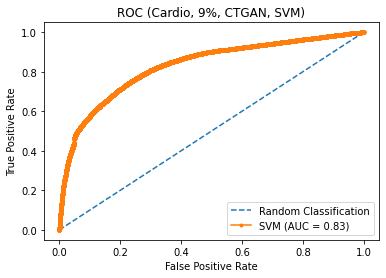

In [98]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [99]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 9%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.683


### XGBoost with CTGAN data

In [100]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [101]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.17585	validation_0-logloss:0.64445	validation_1-error:0.26126	validation_1-logloss:0.65118
[1]	validation_0-error:0.18214	validation_0-logloss:0.60479	validation_1-error:0.27960	validation_1-logloss:0.61567
[2]	validation_0-error:0.18403	validation_0-logloss:0.57250	validation_1-error:0.29086	validation_1-logloss:0.58764
[3]	validation_0-error:0.15076	validation_0-logloss:0.54029	validation_1-error:0.22499	validation_1-logloss:0.55991
[4]	validation_0-error:0.15220	validation_0-logloss:0.51728	validation_1-error:0.22852	validation_1-logloss:0.54022
[5]	validation_0-error:0.15067	validation_0-logloss:0.49354	validation_1-error:0.22499	validation_1-logloss:0.51988
[6]	validation_0-error:0.14025	validation_0-logloss:0.47766	validation_1-error:0.15348	validation_1-logloss:0.50583
[7]	validation_0-error:0.13436	validation_0-logloss:0.46375	validation_1-error:0.15741	validation_1-logloss:0.49356
[8]	validation_0-error:0.14029	validation_0-logloss:0.44983	validation_1

[71]	validation_0-error:0.08314	validation_0-logloss:0.23933	validation_1-error:0.13004	validation_1-logloss:0.33517
[72]	validation_0-error:0.08307	validation_0-logloss:0.23749	validation_1-error:0.12952	validation_1-logloss:0.33392
[73]	validation_0-error:0.08319	validation_0-logloss:0.23690	validation_1-error:0.12978	validation_1-logloss:0.33367
[74]	validation_0-error:0.08292	validation_0-logloss:0.23618	validation_1-error:0.13004	validation_1-logloss:0.33334
[75]	validation_0-error:0.08253	validation_0-logloss:0.23539	validation_1-error:0.12912	validation_1-logloss:0.33322
[76]	validation_0-error:0.08229	validation_0-logloss:0.23455	validation_1-error:0.12912	validation_1-logloss:0.33266
[77]	validation_0-error:0.08209	validation_0-logloss:0.23412	validation_1-error:0.12912	validation_1-logloss:0.33250
[78]	validation_0-error:0.08189	validation_0-logloss:0.23347	validation_1-error:0.12926	validation_1-logloss:0.33226
[79]	validation_0-error:0.08161	validation_0-logloss:0.23263	val

[141]	validation_0-error:0.07306	validation_0-logloss:0.20199	validation_1-error:0.12127	validation_1-logloss:0.32021
[142]	validation_0-error:0.07306	validation_0-logloss:0.20190	validation_1-error:0.12127	validation_1-logloss:0.32010
[143]	validation_0-error:0.07288	validation_0-logloss:0.20167	validation_1-error:0.12114	validation_1-logloss:0.32006
[144]	validation_0-error:0.07286	validation_0-logloss:0.20155	validation_1-error:0.12127	validation_1-logloss:0.32007
[145]	validation_0-error:0.07285	validation_0-logloss:0.20144	validation_1-error:0.12087	validation_1-logloss:0.31994
[146]	validation_0-error:0.07261	validation_0-logloss:0.20055	validation_1-error:0.12087	validation_1-logloss:0.31946
[147]	validation_0-error:0.07225	validation_0-logloss:0.19984	validation_1-error:0.12087	validation_1-logloss:0.31928
[148]	validation_0-error:0.07222	validation_0-logloss:0.19919	validation_1-error:0.12048	validation_1-logloss:0.31898
[149]	validation_0-error:0.07218	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     27743
           1       0.96      0.90      0.93     27743

    accuracy                           0.93     55486
   macro avg       0.94      0.93      0.93     55486
weighted avg       0.94      0.93      0.93     55486



In [103]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6936
           1       0.23      0.12      0.15       700

    accuracy                           0.88      7636
   macro avg       0.57      0.54      0.55      7636
weighted avg       0.85      0.88      0.87      7636



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.979


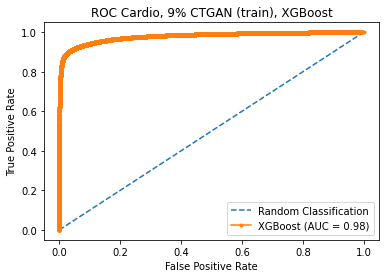

In [104]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.733


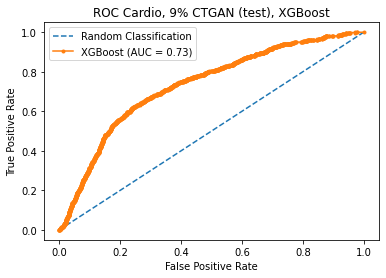

In [105]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 9% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()